In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\Jasin\OneDrive\Desktop\AIML\data.csv")

print(df.head())
print(df.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [3]:
if "diagnosis" in df.columns:
    df.rename(columns={"diagnosis":"target"}, inplace=True)
if df["target"].dtype == "object":
    df["target"] = df["target"].map({"M":1,"B":0})
if "id" in df.columns:
    df.drop(columns=["id"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)


In [4]:
X = df.drop("target", axis=1)
y = df["target"]
X = X.iloc[:, :2]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [7]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

linear_pred = svm_linear.predict(X_test)
print("\nLinear SVM Accuracy:", accuracy_score(y_test, linear_pred))


Linear SVM Accuracy: 0.9035087719298246


In [8]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
rbf_pred = svm_rbf.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, rbf_pred))

RBF SVM Accuracy: 0.9210526315789473


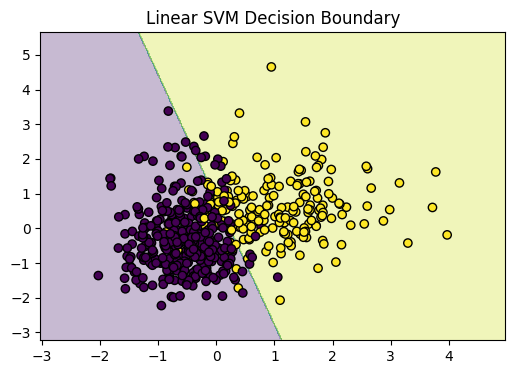

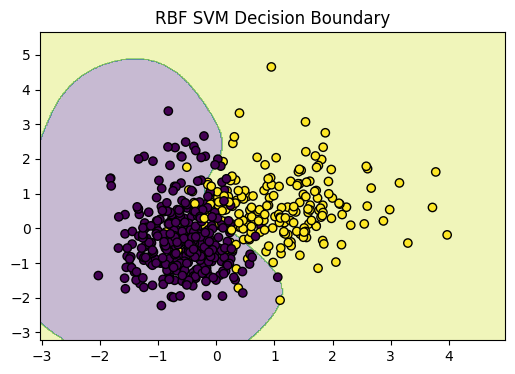

In [9]:
def plot_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                         np.arange(y_min,y_max,h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,4))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    plt.title(title)
    plt.show()

plot_boundary(svm_linear, X_scaled, y, "Linear SVM Decision Boundary")
plot_boundary(svm_rbf, X_scaled, y, "RBF SVM Decision Boundary")

In [10]:
svm_tuned = SVC(kernel='rbf', C=10, gamma=0.1)
svm_tuned.fit(X_train, y_train)

print("Tuned SVM Accuracy:",
      accuracy_score(y_test, svm_tuned.predict(X_test)))

Tuned SVM Accuracy: 0.9122807017543859


In [11]:
cv_scores = cross_val_score(svm_tuned, X_scaled, y, cv=5)

print("\nCross Validation Accuracy:", cv_scores.mean())


Cross Validation Accuracy: 0.8963204471355379
